### <b>Chapter 8: Computation on Arrays: Broadcasting</b>

In [116]:
import numpy as np
a = np.array([0, 1, 2]) #1D
print(a.ndim)
b = np.array([5, 5, 5]) #1D
a + b

1


array([5, 6, 7])

In [117]:
a + 5

array([5, 6, 7])

In [118]:
c = np.array([7])
print(c.ndim)
print(c + a)
m = 5


1
[7 8 9]


In [119]:
x = np.array([1, 2, 3])
print(x)

[1 2 3]


In [120]:
print(x.reshape((1, 3)))
print(x[np.newaxis, :])

[[1 2 3]]
[[1 2 3]]


In [121]:
print(x.reshape((3, 1)))
print(x[:, np.newaxis])

[[1]
 [2]
 [3]]
[[1]
 [2]
 [3]]


In [122]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis] # flip the axis vertically
print(a, b, a+b, sep="\n\n")
print(b.ndim)

[0 1 2]

[[0]
 [1]
 [2]]

[[0 1 2]
 [1 2 3]
 [2 3 4]]
2


In [123]:
w = np.arange(12).reshape(3, 4)
print(w)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


## NumPy Broadcasting Rules Explained with Examples

<b>Rule 1: Padding with Ones on the Left</b>
<br>
📌 If the two arrays have a different number of dimensions, the smaller-dimensional array is padded with ones on the left until both shapes have the same number of dimensions.

Example: (adding a two-dimensional array to a one-dimensional array)

In [62]:
A = np.array([1, 2, 3]) # 1D array
# print(A.shape)
#output: (3,)
"""
The number 3: The array has 3 elements.
The comma ,: It indicates that the array is one-dimensional.
"""
B = np.array([[1], [2], [3]])   # Shape: (3, 1) -> 2D array

"""
#output: 
[[1]
 [2]
 [3]]
There are 3 rows (each containing a single element).
There is only 1 column.
"""
C = A + B
print(A, B, C, sep="\n\n")
print(A.reshape(1, 3))


[1 2 3]

[[1]
 [2]
 [3]]

[[2 3 4]
 [3 4 5]
 [4 5 6]]
[[1 2 3]]


<b>Rule 2: Expanding Singleton Dimensions</b>
<br>
📌 If the shapes do not match in a particular dimension, but one of the arrays has size 1 in that dimension, NumPy expands it to match the other array’s size.

Example 1:

In [51]:
A = np.array([[1, 2, 3], [4, 5, 6]])  # Shape: (2, 3)
B = np.array([[10], [20]])            # Shape: (2, 1)

C = A + B  # Broadcasting applies here
'''
Before broadcasting:

A: Shape (2,3)
B: Shape (2,1)
After broadcasting:

B expands to shape (2,3) by replicating values along axis 1.
'''
print(A, B, C, sep="\n\n") #B gets "stretched" to (2,3), and element-wise addition is performed.

[[1 2 3]
 [4 5 6]]

[[10]
 [20]]

[[11 12 13]
 [24 25 26]]


<b>Rule 3: Mismatched Shapes Raise an Error</b>
<br>
📌 If in any dimension the sizes are different and neither is 1, broadcasting fails, and an error is raised.

Example (Error Case):

In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6]])  # Shape: (2,3)
B = np.array([10, 20])                # Shape: (2,)

'''
Why does it fail?

A has shape (2,3), while B has shape (2,).
NumPy tries to match (2,3) with (2,), but since B has no size 1 in the second dimension, it cannot be stretched.
Since neither dimension is 1, broadcasting fails.
'''
C = A + B  # This will raise an error

#ValueError: operands could not be broadcast together with shapes (2,3) (2,)

#To fix this, reshape B to (2,1) or (1,3) so it can be broadcasted.

<b>More examples:</b>

In [65]:
M = np.ones((2, 3)) #shape = (2, 3)
a = np.arange(3) #shape = (3,)
E = M + a
print(E)
print(a)
print(a.reshape(1,3))
print(M)

[[1. 2. 3.]
 [1. 2. 3.]]
[0 1 2]
[[0 1 2]]
[[1. 1. 1.]
 [1. 1. 1.]]


In [71]:
M = np.ones((3, 2)) #shape = (3, 2)
a = np.arange(3) #shape = (3,)
# E = M + a  #ValueError: operands could not be broadcast together with shapes (3,2) (3,) 
# print(E)
print(a)
# print(a.reshape(1,3))
print(M)
p = a[:, np.newaxis]
print(p)  # shape = (3, 1)
i = p + M
print(i)

[0 1 2]
[[1. 1.]
 [1. 1.]
 [1. 1.]]
[[0]
 [1]
 [2]]
[[1. 1.]
 [2. 2.]
 [3. 3.]]


## Centering an Array

In [74]:
rng = np.random.default_rng(seed=1701)
X = rng.random((10, 3))
print(X)

[[0.4020733  0.30563311 0.67668051]
 [0.15821208 0.79247763 0.09419469]
 [0.36753944 0.06388928 0.96431608]
 [0.35200998 0.54550343 0.88597945]
 [0.57016965 0.26614394 0.8170382 ]
 [0.55906652 0.06387035 0.84877751]
 [0.89414484 0.18920785 0.23660015]
 [0.16502896 0.56583856 0.29513111]
 [0.29078012 0.90079544 0.59992434]
 [0.09133896 0.00578466 0.97096222]]


In [76]:
Xmean = X.mean(0)
print(Xmean)

[0.38503638 0.36991443 0.63896043]


In [83]:
kl = np.arange(12).reshape(4, 3)
kl

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [87]:
klmean = kl.mean(0)
print(klmean)

[4.5 5.5 6.5]


In [86]:
klmean1 = kl.mean(1)
print(klmean1)

[ 1.  4.  7. 10.]


In [88]:
kl_centered = kl - klmean
print(kl_centered)

[[-4.5 -4.5 -4.5]
 [-1.5 -1.5 -1.5]
 [ 1.5  1.5  1.5]
 [ 4.5  4.5  4.5]]


In [89]:
u = kl_centered.mean(0)
u

array([0., 0., 0.])

In [114]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(100 + y * x) * np.cos(x)
# z = np.sin(x) ** 2 + np.cos(y) ** 2

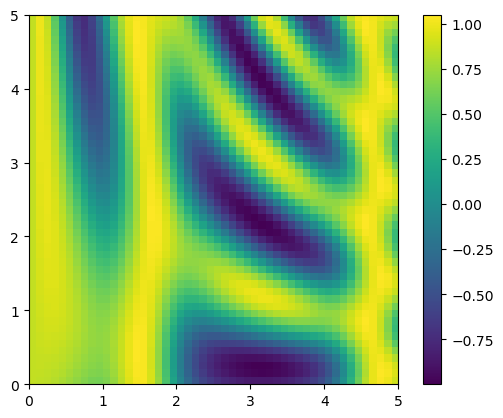

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5])
plt.colorbar();
# print(x)